# Create PyGMT Map

In [1]:
import xarray as xr
import cmocean as cmo

In [2]:
ds = xr.open_dataset("/albedo/work/user/quraus001/bath/ETOPO_2022_v1_60s_N90W180_bed.nc")

# Crop to Fram Strait region
ds = ds.sel(
    lon=slice(-45, 45),    
    lat=slice(58, 85)).copy()

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cmocean

def save_cmocean_to_cpt(cmap, filename="custom.cpt", vmin=0, vmax=1, n=256):
    """
    Save a matplotlib colormap (like from cmocean) to a GMT-compatible CPT file.
    
    Parameters:
        cmap     : A matplotlib colormap (e.g., cmocean.cm.ice)
        filename : Output CPT filename
        vmin     : Minimum data value
        vmax     : Maximum data value
        n        : Number of color steps
    """
    colors = cmap(np.linspace(0, 1, n))
    with open(filename, "w") as f:
        for i in range(n - 1):
            z1 = vmin + i * (vmax - vmin) / n
            z2 = vmin + (i + 1) * (vmax - vmin) / n
            r1, g1, b1, _ = (colors[i] * 255).astype(int)
            r2, g2, b2, _ = (colors[i + 1] * 255).astype(int)
            f.write(f"{z1:.6f} {r1} {g1} {b1}  {z2:.6f} {r2} {g2} {b2}\n")
        f.write(f"B 0 0 0\nF 255 255 255\nN 128 128 128\n")


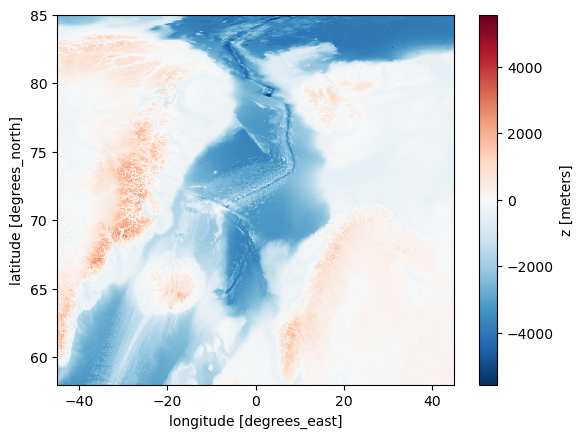

In [6]:
ds.z.plot()

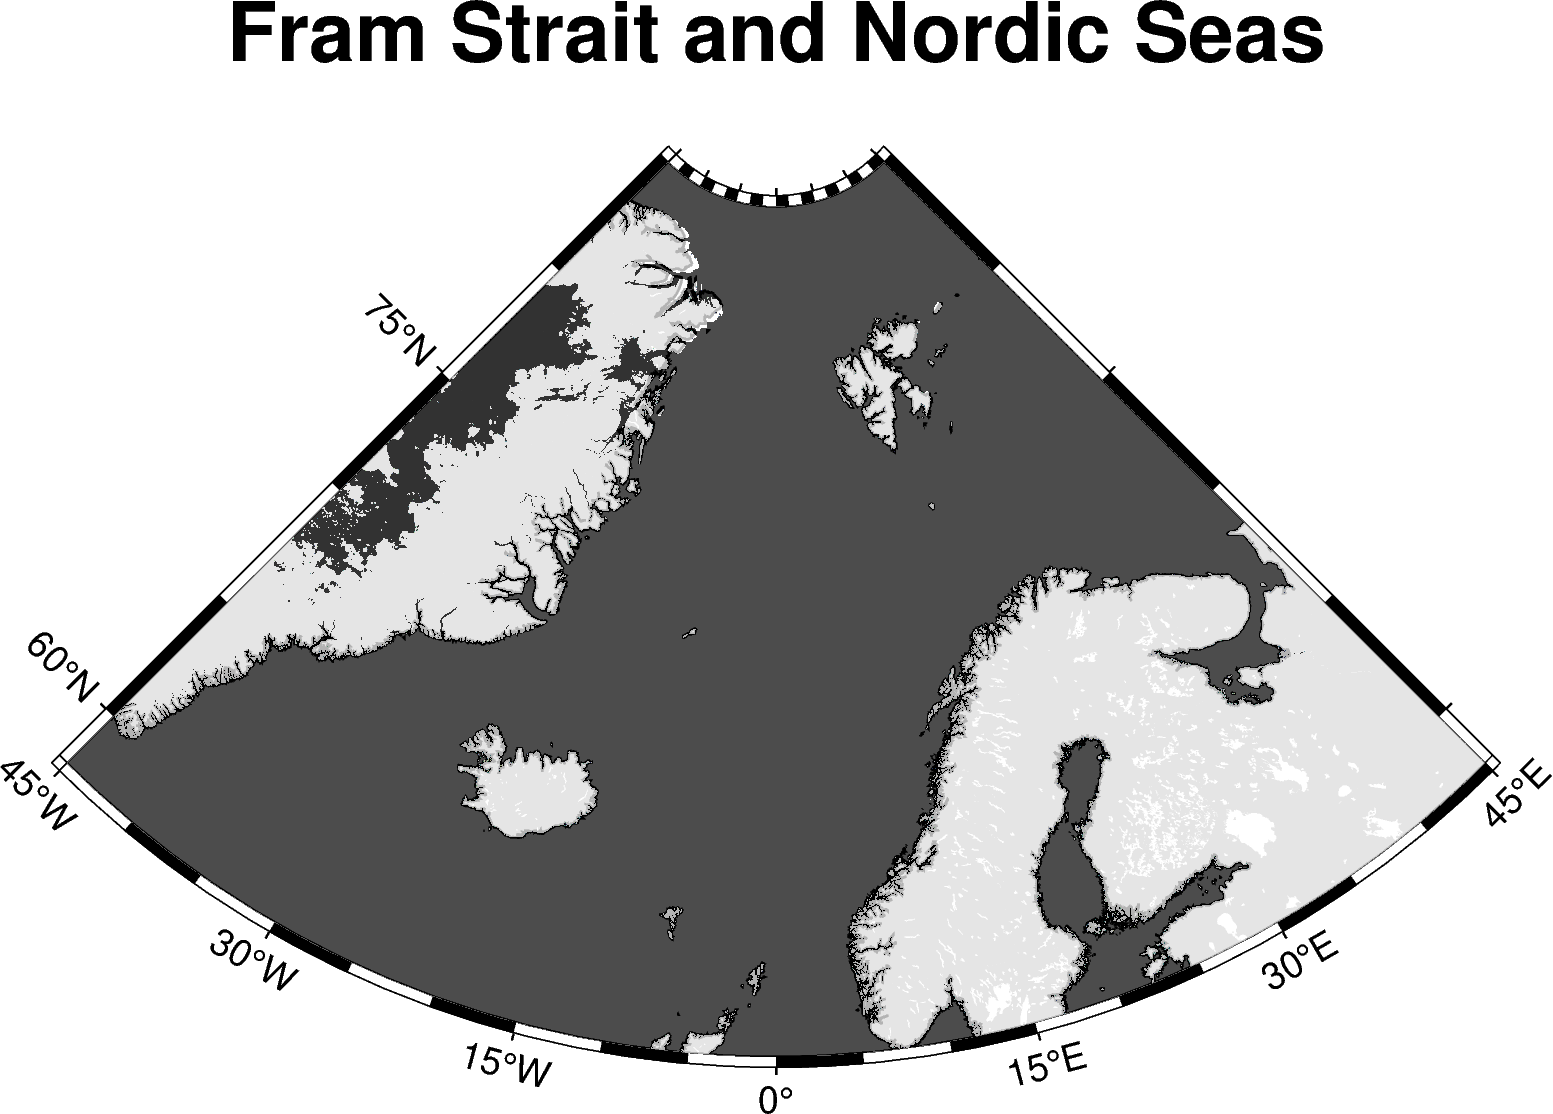

In [7]:
import pygmt

# Define region in terms of lat/lon bounds
# Approximate bounding box: [longitude_min, longitude_max, latitude_min, latitude_max]
region = [-45, 45, 58, 85]  # Covers Greenland, Fram Strait, Barents Sea

# Create a figure
fig = pygmt.Figure()

# Define the north polar stereographic projection: S (stereographic), center at 90N/0E, 12 cm diameter
projection = "S0/90/12c"

# Draw coastlines
fig.coast(
    region=region,
    projection=projection,
    land="darkgray",
    water="white",
    shorelines="1/0.5p,black",
    frame="af",
)

# Add gridlines
#fig.basemap(frame=["xa10", "ya5", "+tFram Strait and Nordic Seas"])
fig.basemap(frame=["+tFram Strait and Nordic Seas"])

# Save a cmocean colormap as CPT
save_cmocean_to_cpt(cmocean.cm.deep, filename="deep.cpt", vmin=0, vmax=1)

fig.grdimage(
    grid=ds["z"],
    cmap="deep.cpt",
    transparency=30
)
# Show or save the map
fig.show()
# fig.savefig("fram_nordic_polar_map.png")
